In [48]:
%run __init__.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creation of dataset annotations

In [49]:
dataset_root = "/home/konstantin/datasets/MegaDepthDataset"
scene_info_root = "/home/konstantin/datasets/MegaDepthDataset/SceneInfo"

# Uncommetns to create whole dataset annotations
# create_dataset_annotations(dataset_root, scene_info_root)

In [50]:
# Uncomment to create a validation dataset
# import Net.source.core.loop as l

# val_scenes = ['0307', '5016', '0482', '0033', '0406']
# val_scenes = ['0039', '0327', '0065', '0025']
# create_annotations_by_scene(scene_info_root, l.VAL, du.MEGADEPTH, val_scenes)

In [51]:
# Uncomment to sample test dataset uniformly from selected scenes
# test_scenes = ['0204', '5014', '0062', '0049']
# test_scenes = ['0237', '0001', '0026', '0022']
# create_mode_sampled_annotations(scene_info_root, l.TEST, du.MEGADEPTH, test_scenes, 400)

In [52]:
# Uncomment to create a visualization dataset
# visualization_scenes = ['5016']
# create_annotations_by_scene(scene_info_root, l.VISUALIZE, du.MEGADEPTH, visualization_scenes)

In [53]:
# Uncomment to create a train dataset
# not_train_scenes = val_scenes + test_scenes
# create_annotations_by_scene(scene_info_root, l.TRAIN, du.MEGADEPTH, not_train_scenes, is_in=False)

In [54]:
# Uncomment to create an analysis dataset
# analysis_scenes = ['5014']
# create_annotations_by_scene(scene_info_root, l.ANALYZE, du.MEGADEPTH, analysis_scenes)

In [55]:
# Uncomment to create warp dataset
# create_annotations_for_warp("/home/konstantin/datasets/MegaDepthDataset/SceneInfo/train_megadepth.csv")

## Check MegaDepth

In [56]:
import Net.source.core.experiment as exp

from Net.source.utils.run_utils import load_config, prepare_dataset_config

dataset_config = load_config('../configs/analyze.yaml')
model_config = load_config('../configs/model.yaml')

mode = 'analyze'
dataset_name = 'megadepth'

dataset_config[exp.DATASET] = prepare_dataset_config(dataset_config[exp.DATASET], mode, dataset_name)

In [57]:
from Net.source.datasets.dataset import create_dataset, create_loader

dataset = create_dataset(dataset_config[exp.DATASET][mode], model_config[exp.MODEL][exp.NET_VGG], mode)
loader = create_loader(dataset, dataset_config[exp.LOADER][mode])

_iter = loader.__iter__()

In [63]:
item = next(_iter)

image1_name = item[du.IMAGE1_NAME]
image2_name = item[du.IMAGE2_NAME]

image1 = item[du.IMAGE1]
image2 = item[du.IMAGE2]

depth1 = item[du.DEPTH1]
depth2 = item[du.DEPTH2]

extrinsic1 = item[du.EXTRINSICS1]
extrinsic2 = item[du.EXTRINSICS2]

intrinsic1 = item[du.INTRINSICS1]
intrinsic2 = item[du.INTRINSICS2]

shift_scale1 = item[du.SHIFT_SCALE1]
shift_scale2 = item[du.SHIFT_SCALE2]

s_image1 = item[du.S_IMAGE1]
s_image2 = item[du.S_IMAGE2]

In [64]:
from Net.source.utils.projection_utils import warp_image_RBT

w_image2, w_vis_mask2 = warp_image_RBT(image2, depth1, intrinsic1, extrinsic1, shift_scale1, depth2, intrinsic2, extrinsic2, shift_scale2)
w_image1, w_vis_mask1 = warp_image_RBT(image1, depth2, intrinsic2, extrinsic2, shift_scale2, depth1, intrinsic1, extrinsic1, shift_scale1)


torch.Size([1, 1, 240, 320])
torch.Size([1, 1, 240, 320])


In [65]:
cv_image1 = torch2cv(image1[0])
cv_image2 = torch2cv(image2[0])

cv_depth1 = torch2cv(depth1[0], normalize=True, to_rgb=True)
cv_depth2 = torch2cv(depth2[0], normalize=True, to_rgb=True)

cv_w_image1 = torch2cv(w_image1[0])
cv_w_image2 = torch2cv(w_image2[0])

cv_s_image1 = torch2cv(s_image1[0])
cv_s_image2 = torch2cv(s_image2[0])

cv_w_vis_mask2 = torch2cv(w_vis_mask2.float()[0], to_rgb=True)
cv_w_vis_mask1 = torch2cv(w_vis_mask1.float()[0], to_rgb=True)

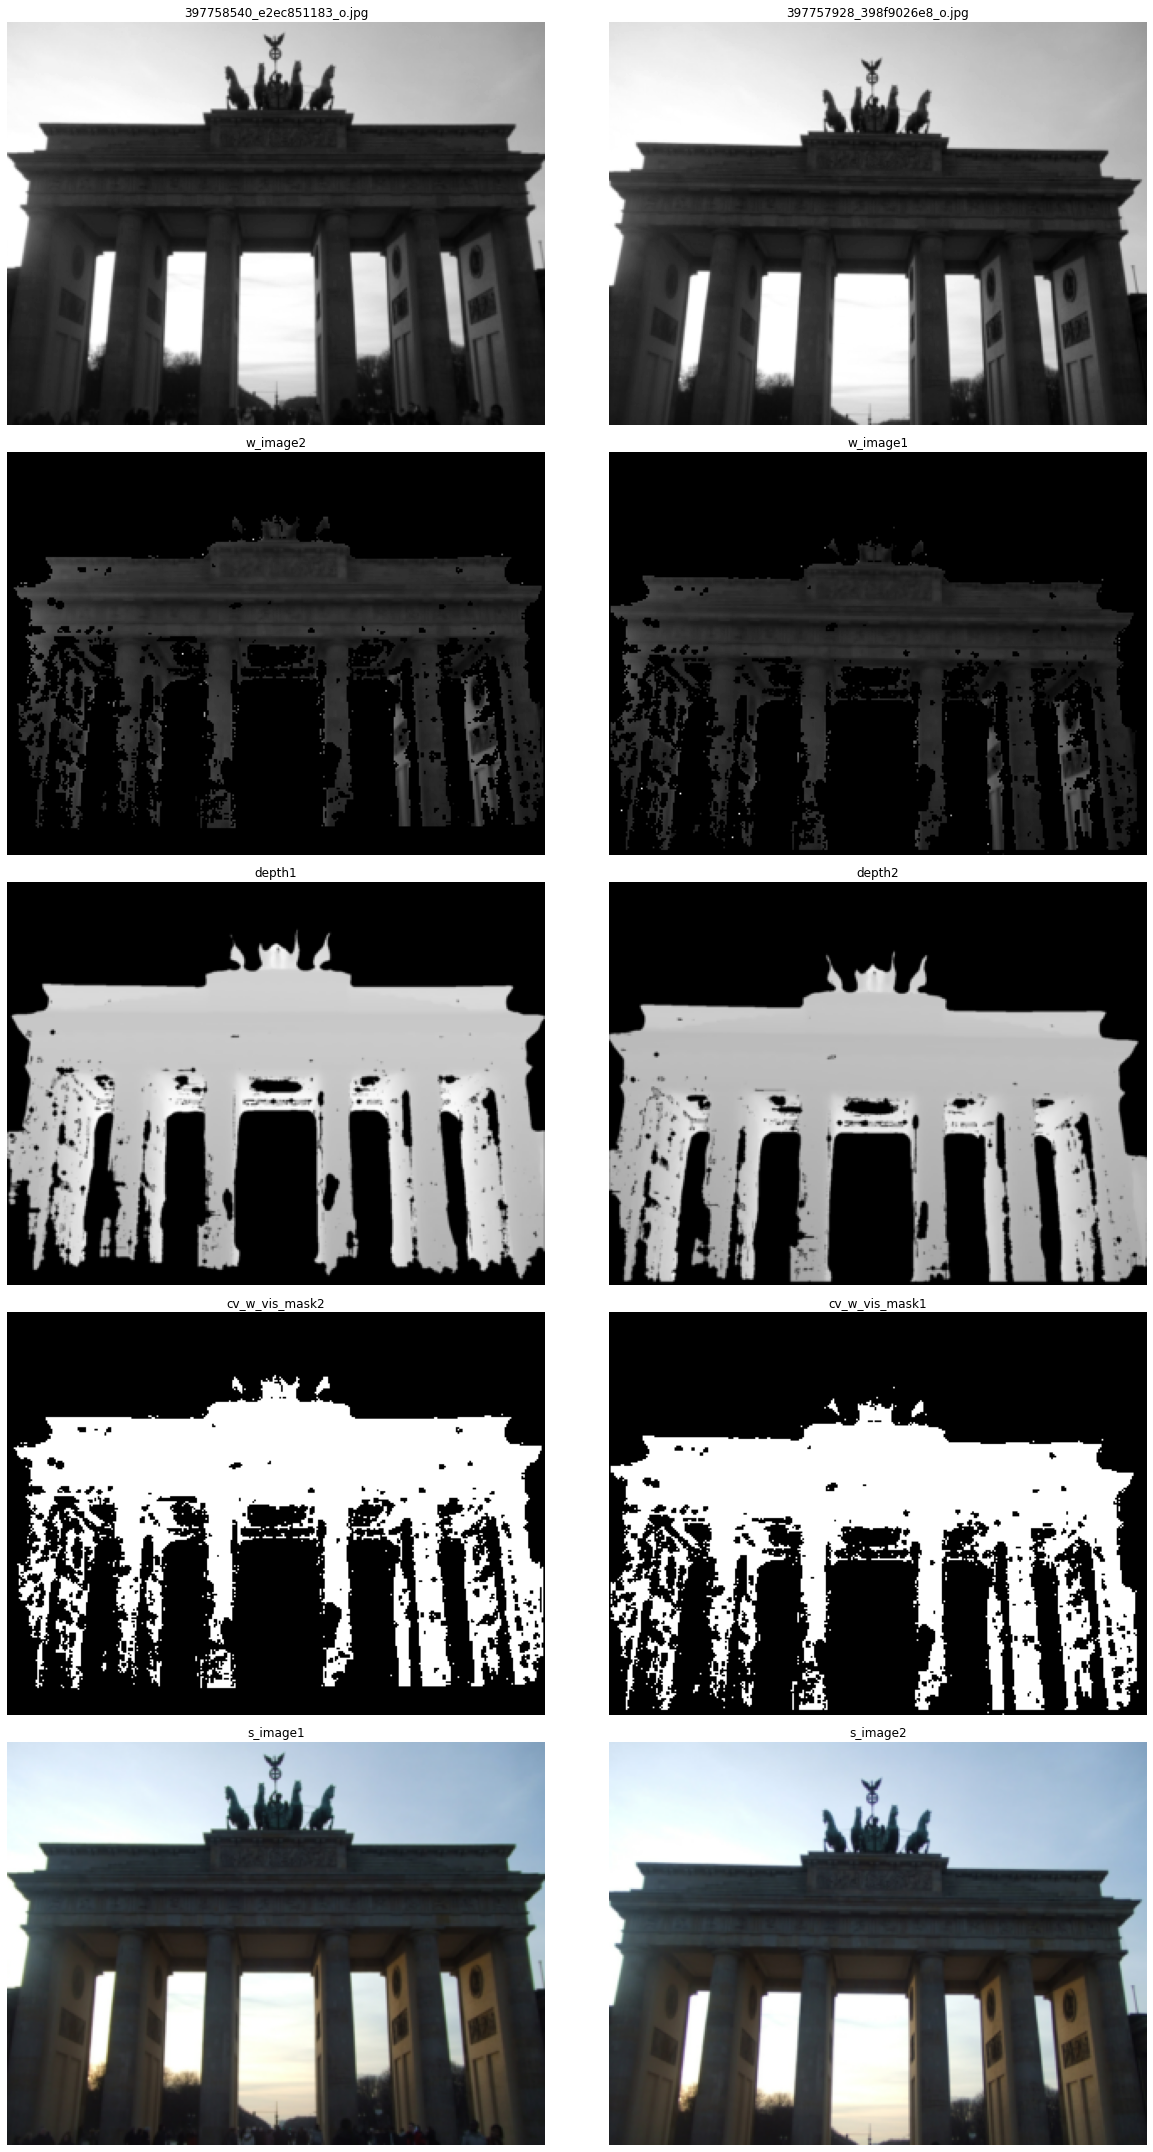

In [66]:
plot_figures({image1_name[0]: cv_image1, image2_name[0]: cv_image2,
              'w_image2': cv_w_image2, 'w_image1': cv_w_image1, 
              'depth1': cv_depth1, 'depth2': cv_depth2,
              'cv_w_vis_mask2': cv_w_vis_mask2, 'cv_w_vis_mask1': cv_w_vis_mask1,
              's_image1': cv_s_image1, 's_image2': cv_s_image2}, 
              5, 2, (18, 30))

# Check Aachen

In [33]:
config = load_config('../configs/analyze.yaml')
mode = 'analyze'
dataset_name = 'aachen'

config[exp.DATASET] = prepare_dataset_config(config[exp.DATASET], mode, dataset_name)

In [42]:
dataset = create_dataset(config[exp.DATASET][mode], mode)
loader = create_loader(dataset, config[exp.LOADER][mode])

_iter = loader.__iter__()

In [43]:
item = next(_iter)

image1_name = item[du.IMAGE1_NAME]

image1 = item[du.IMAGE1]

In [44]:
cv_image1 = torch2cv(image1[0], to_rgb=True)

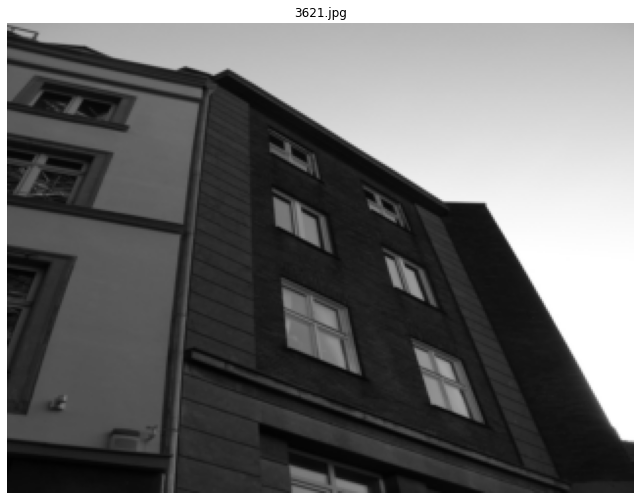

In [45]:
plot_figures({image1_name[0]: cv_image1}, 
              1, 1, (9, 9))

In [3]:
# l = loader.__iter__()

# item_transform = [dt.RandomWarp(),
#                   dt.ToPILImage(),
#                   dt.GrayScale(),
#                   dt.Resize((960, 1280)),
#                   dt.RandomCrop((888, 1184)),
#                   dt.Resize((240, 320)),
#                   dt.ToTensor()]
# sources = True

# csv_path = "/home/konstantin/datasets/MegaDepthDataset/SceneInfo/train_megadepth_warp.csv"

# dataset = MegaDepthWarpDataset(dataset_root, csv_path, transforms.Compose(item_transform), sources)
# loader = DataLoader(dataset, batch_size=16, num_workers=8)

# item = next(l)

# image1_name = item[d.IMAGE1_NAME]
# image2_name = item[d.IMAGE2_NAME]

# image1 = item[d.IMAGE1]
# image2 = item[d.IMAGE2]

# homo12 = item[d.HOMO12]
# homo21 = item[d.HOMO21]

# s_image1 = item[d.S_IMAGE1]
# s_image2 = item[d.S_IMAGE2]

# w_image2 = warp_image_homo(image1.shape, image2, homo12)
# w_image1 = warp_image_homo(image2.shape, image1, homo21)

# cv_image1 = torch2cv(image1[0], to_rgb=True)
# cv_image2 = torch2cv(image2[0], to_rgb=True)

# cv_w_image1 = torch2cv(w_image1[0], to_rgb=True)
# cv_w_image2 = torch2cv(w_image2[0], to_rgb=True)

# cv_s_image1 = torch2cv(s_image1[0])
# cv_s_image2 = torch2cv(s_image2[0])

# plot_figures({image1_name[0]: cv_image1, image2_name[0]: cv_image2,
#               'w_image2': cv_w_image2, 'w_image1': cv_w_image1, 
#               's_image1': cv_s_image1, 's_image2': cv_s_image2}, 
#               3, 2, (18, 24))